In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


## Yeu cau 1

In [16]:
j_path = '/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/j.png'

In [17]:
j_img = cv2.imread(j_path, 0)
kernel = np.ones((5, 5), np.uint8)

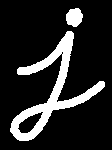

In [18]:
cv2_imshow(j_img)

### 1.Erosion

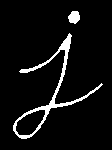

In [19]:
img_erosion = cv2.erode(j_img, kernel, iterations=1)
cv2_imshow(img_erosion)

### 2.Dilation

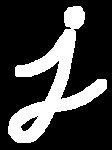

In [20]:
img_dilation = cv2.dilate(j_img, kernel, iterations=1)
cv2_imshow(img_dilation)

### 3.Opening


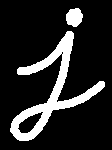

In [25]:

binr = cv2.threshold(j_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

kernel = np.ones((3, 3), np.uint8)

opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,
						kernel, iterations=1)

cv2_imshow(opening)


### 4.Closing

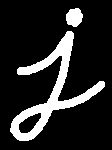

In [26]:
binr = cv2.threshold(j_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

kernel = np.ones((3, 3), np.uint8)

closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE,
						kernel, iterations=1)

cv2_imshow(closing)

## Yeu cau 2

In [27]:
vantay_path = '/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/vantay.jpg'
coins_path = '/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/coins.png'
rice_path = '/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/rice.png'

In [85]:
vantay_img = cv2.imread(vantay_path,0)
coins_img = cv2.imread(coins_path,0)
rice_img = cv2.imread(rice_path,0)

Text(0.5, 1.0, 'Rice')

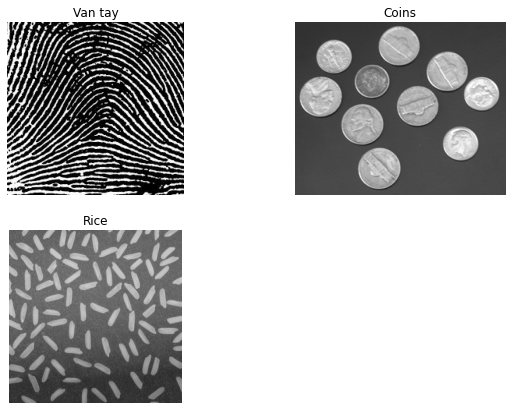

In [37]:
fig = plt.figure(figsize=(10, 7))
rows, columns = 2, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(vantay_img, cmap='gray')
plt.axis('off')
plt.title("Van tay")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(coins_img, cmap='gray')
plt.axis('off')
plt.title("Coins")

fig.add_subplot(rows, columns, 3)
plt.imshow(rice_img, cmap='gray')
plt.axis('off')
plt.title("Rice")

In [59]:
def threshold(img, T):
    new_img = img.copy()
    w, h = img.shape[:2]
    for i in range (w):
        for j in range (h):
                if (img[i][j]) > T:
                    new_img[i][j] = 255
                else:
                    new_img[i][j] = 0
    return new_img

Text(0.5, 1.0, 'Result')

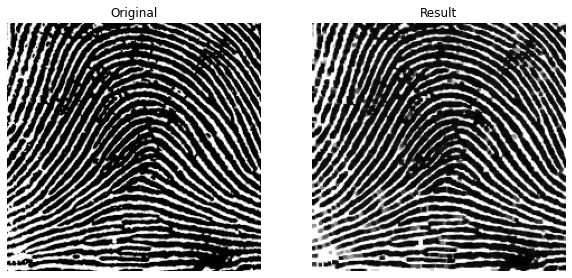

In [98]:

i = 2
kernel = np.ones((i, i), np.uint8) 
img_dilation = cv2.dilate(vantay_img, kernel, iterations=2)

j = 3
kernel = np.ones((j, j), np.uint8)
res = cv2.erode(img_dilation, kernel, iterations=1)
fig = plt.figure(figsize=(10, 7))

rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(vantay_img, cmap='gray')
plt.axis('off')
plt.title("Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.title("Result")


Text(0.5, 1.0, 'Result')

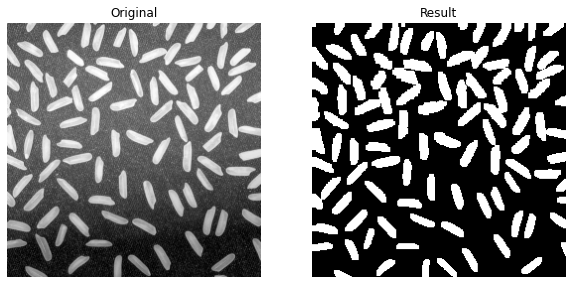

In [93]:
i = 2
kernel = np.ones((i, i), np.uint8)

opening = cv2.morphologyEx(rice_img, cv2.MORPH_OPEN, kernel, iterations=3)
res = threshold(opening, 110)

fig = plt.figure(figsize=(10, 7))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(rice_img, cmap='gray')
plt.axis('off')
plt.title("Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.title("Result")

Text(0.5, 1.0, 'Result')

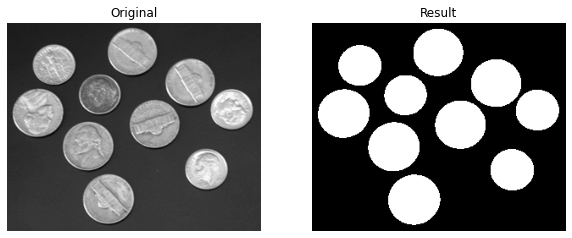

In [103]:
i = 2
kernel = np.ones((i, i), np.uint8)

opening = cv2.morphologyEx(coins_img, cv2.MORPH_OPEN, kernel, iterations=1)
res = threshold(opening, 80)


fig = plt.figure(figsize=(10, 7))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(coins_img, cmap='gray')
plt.axis('off')
plt.title("Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.title("Result")

## Yeu cau 3

In [104]:
art_path = '/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/art8.jpg'

In [105]:
art_img = cv2.imread(art_path,0)

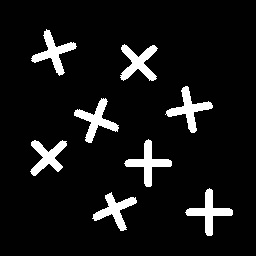

In [106]:
cv2_imshow(art_img)

In [115]:
thres = threshold(art_img,127)

num_labels, labels = cv2.connectedComponentsWithStats(thres, 4, cv2.CV_32S)[:2]
    
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

labeled_img[label_hue==0] = 0
    

Text(0.5, 1.0, 'Result')

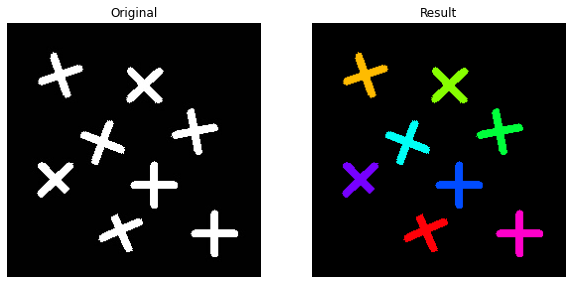

In [117]:
fig = plt.figure(figsize=(10, 7))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(art_img, cmap='gray')
plt.axis('off')
plt.title("Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title("Result")

## Yeu cau 4

In [154]:
soxe1 = cv2.imread('/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/Bansoxe01.jpg')
soxe2 = cv2.imread('/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/Bansoxe02.jpg')
soxe3 = cv2.imread('/content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images/Bansoxe03.jpg')

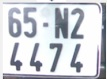

In [155]:
cv2_imshow(soxe3)

In [209]:
gray = cv2.cvtColor(soxe3, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]
output_bsx2 = cv2.connectedComponentsWithStats( thresh, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output_bsx2

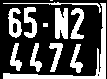

In [210]:
cv2_imshow(thresh)

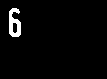

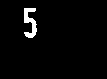

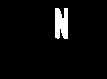

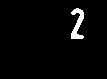

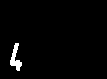

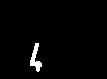

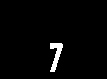

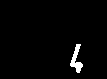

In [231]:
gray = cv2.cvtColor(soxe3, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)[1]
output_bsx3 = cv2.connectedComponentsWithStats( thresh, 8, cv2.CV_32S)
(num_labels, labels, stats, centroids) = output_bsx3
for i in range(0, num_labels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]    
    area = stats[i, cv2.CC_STAT_AREA]

    (cX, cY) = centroids[i]
    if w < 5 or h < 5 or w>20:
     continue

    output = soxe3.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 8, (0, 0, 255), -1)
    componentMask = (labels == i).astype("uint8") * 255
    cv2_imshow(componentMask)
    